#  Reading data using pandas

Pandas: popular Python library for data exploration, manipulation, and analysis

In [29]:
# conventional way to import pandas
import pandas as pd
import numpy as np

# read CSV file directly from a URL and save the results
# use .read_csv method and simply pass in the name of the files (local and through a url)
# to find out more about this method, click on the url and press shift + tab (twice)
# we set the index_col=0
data = pd.read_csv('Advertising.csv', index_col=0)



#Primary object types:

    DataFrame: rows and columns (like a spreadsheet or matrix)
        First row will always be the column headers
        First column is an index
    Series: a single column (vector)



In [30]:
#display the first 15 rows
data.head(15)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [31]:
# check the shape of the DataFrame (rows, columns)
# there are 200 rows x 4 columns
data.shape



(200, 4)



What are the features?

    TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
    Radio: advertising dollars spent on Radio
    Newspaper: advertising dollars spent on Newspaper

What is the response?

    Sales: sales of a single product in a given market (in thousands of items)

What else do we know?

    Because the response variable is continuous, this is a regression problem.
    There are 200 observations (represented by the rows), and each observation is a single market.



## 3. Visualizing data using seaborn

Seaborn: Python library for statistical data visualization built on top of Matplotlib

    Anaconda users: run conda install seaborn from the command line

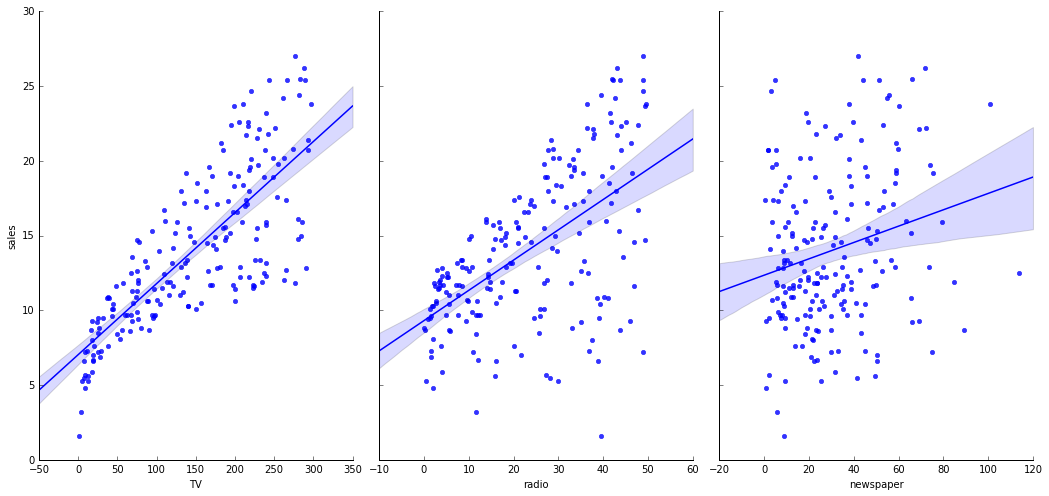

In [32]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')



# Obsevations

    1. Strong relationship between TV ads and sales
    2. Weak relationship between Radio ads and sales
    3. Very weak to no relationship between Newspaper ads and sales



In [17]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line using double square brackets
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
X = data[['TV', 'radio', 'newspaper']]

# print the first 5 rows
X.head()



,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [18]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [20]:
# select a Series from the DataFrame
y = data['sales']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
y = data.sales

# print the first 5 values
y.head()



1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [21]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [22]:
# Splitting the data into   
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


# Linear Regression in Scikit-learn

In [24]:
 #import  linear regression model 
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662231793
[0.04656457 0.17915812 0.00345046]


In [33]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [35]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895
